In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import Image

%config InlineBackend.figure_format = 'retina'

# ML is art and science of making computer able to learn to make decisions from data without explicit programming.
## E.g. learning to filter spam email or clustering wiki pages into cats
## SL is use of labelled data, UL is unlabelled
## UL uncovers hidden patterns from unlabelled data, like grouping customers into distinct cat (clustering)
## UL REINFORCEMENT LEARNING is software agents interacting with an ENV, learning how to optimise behaviour, carrot and sticks (Alpha GO)


# SL: predictor variables/features and traget variable
## AIM: predict target var, given features
## CLASSIFICATION: target var is CAT
## REGRESSION: target var is CONT

### APPLICATION: time-consuming or expensive manual task or prediction
### Requires LABEL data: historical, experiment, crowd-sourcing

## SciKit-Learn integrates with SciPy (other: TensorFlow)

In [2]:
# EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [4]:
plt.style.use('ggplot')

iris = datasets.load_iris()
print(iris.keys())
type(iris.data), type(iris.target)
iris.target_names
type(iris)
    # iris loaded is a SKL object

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


(numpy.ndarray, numpy.ndarray)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

sklearn.utils.Bunch

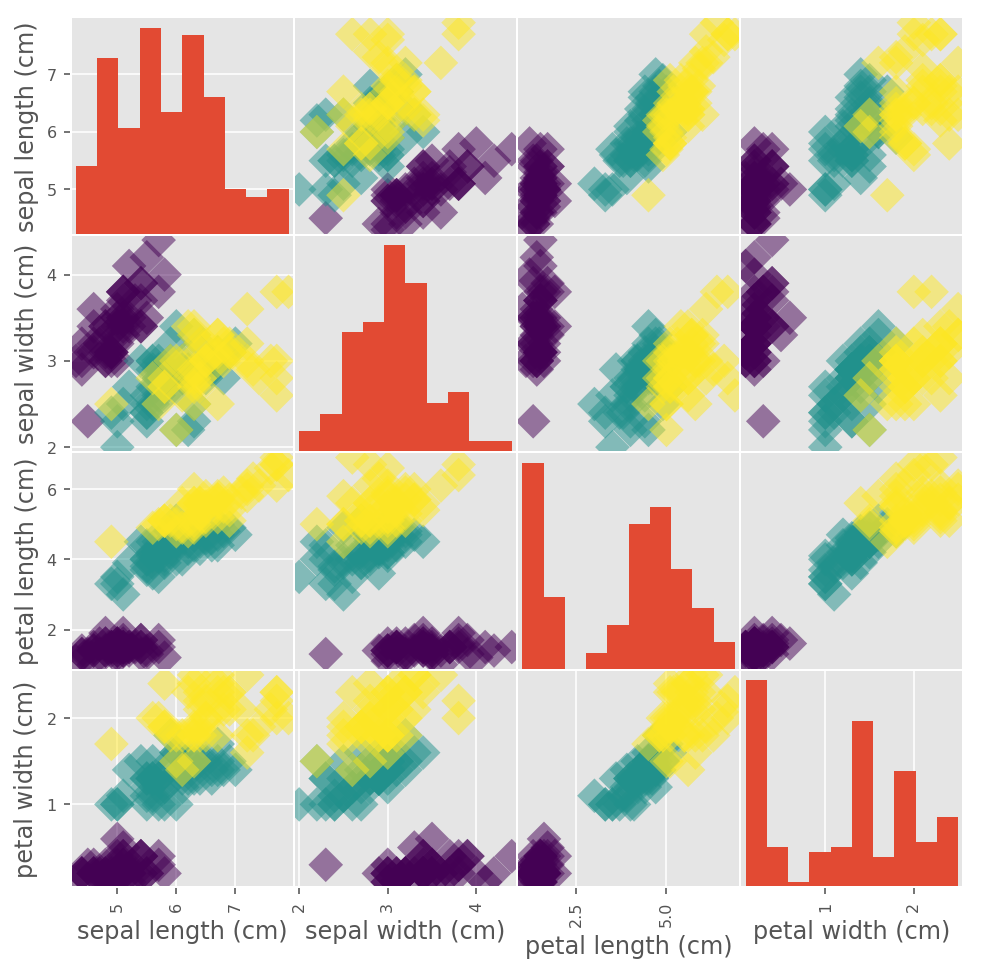

In [8]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

_ = pd.plotting.scatter_matrix(df, c=y, figsize=[8,8], s=150, marker='D')

# Train Data: K-NEAREST NEIGHOURS (KNN)
## 'k' closest labelled data points taking majority vote
# All ML models implemented as CLASS
## Apply algorithms and store learned data
## traning model .fit() method

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors=6)

# knn.fit(iris.data, iris.target)
    # need NP or PD data formats / features = CONT / target = CAT / NO MISSING
    # features in ARRAY, same ROWs in target COL

# prediction = knn.predict(X_new)

# print('Prediction {}'.format(prediction))

# possible creating array for features and response variable
# y = df['party'].values
# X = df.drop('party', axis=1).values
# KEY: .drop() to drop TARGET 'party' and make NP arrays of X,y (SKL API will accept DF and Series, given right SHAPE)



# ACCURACY
## Measured by FRACTION OF CORRECT PREDICTION
## BUT which data used to compute ?
## Generalised: split data into TRAIN and TEST (LABELLED)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=0.3, random_state=21, stratify=y)

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

0.9555555555555556

## COMPLEXITY: BOUNDARIES
### BIG K: smoother decision boundary = less complex model
### SMALL K: more complex model = overfitting, sensitive to noise
### Sweet Spot of K between OVER and UNDER fit AGAINST ACCURACY

## CASE: digits recognition dataset: MNIST, 8x8 img, ranging 0-16 of variation of black
### SKL built-in datasets are type BUNCH, or DICT-like objects

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR']) Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

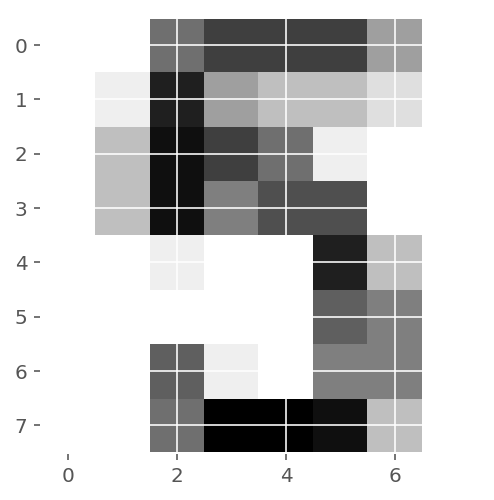

In [15]:
digits = datasets.load_digits()

print(digits.keys(), digits.DESCR)

print(digits.images.shape)
print(digits.data.shape)

plt.imshow(digits.images[1010], cmap=plt.cm.gray_r,
          interpolation='nearest')
plt.show()

In [17]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print(knn.score(X_test,y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

0.9833333333333333


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

Text(0.5,1,'k-NN: Varying Number of Neighbors')

Text(0.5,0,'Number of Neighbors')

Text(0,0.5,'Accuracy')

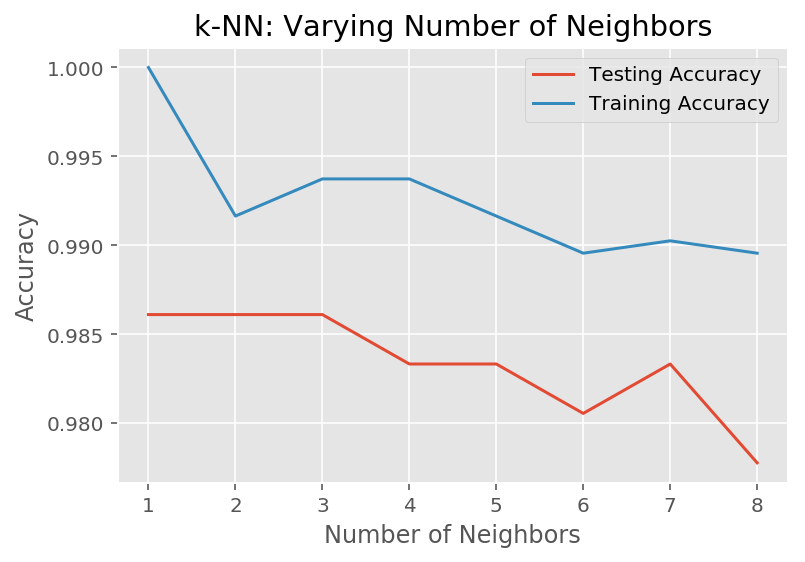

In [19]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# REGRESSION
## data in NP or DF, wrangling if needed
## Slicing from DF = 'series' INVALID
## reshape((-1,1)) into NP array


In [128]:
df = pd.read_csv('Data_Folder/gapminder_tidy.csv')
df.head()

df = df.dropna(axis=0, how='any')

# Create arrays for features and target variable
life = np.array(df['life'])
fertility = np.array(df['fertility'])
# Print the dimensions of X and y before reshaping
print("Dimensions of life before reshaping: {}".format(life.shape))
life[:5]

print("Dimensions of fertility before reshaping: {}".format(fertility.shape))
fertility[:5]


# Reshape X and y
life = life.reshape(-1,1)
fertility = fertility.reshape(-1,1)
# Print the dimensions of X and y after reshaping
print("Dimensions of life after reshaping: {}".format(life.shape))
life[:5]
print("Dimensions of fertility after reshaping: {}".format(fertility.shape))
fertility[:5]

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


Dimensions of life before reshaping: (8836,)


array([33.639, 34.152, 34.662, 35.17 , 35.674])

Dimensions of fertility before reshaping: (8836,)


array([7.671, 7.671, 7.671, 7.671, 7.671])

Dimensions of life after reshaping: (8836, 1)


array([[33.639],
       [34.152],
       [34.662],
       [35.17 ],
       [35.674]])

Dimensions of fertility after reshaping: (8836, 1)


array([[7.671],
       [7.671],
       [7.671],
       [7.671],
       [7.671]])

# ERROR MINIMISATION = LOSS OR COST FUNCTION, RESIDUAL
## Loss Function - OLS ($Min \sqrt{residuals}$)
### Regularised (rlm) mostly used

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

0.702312288038206


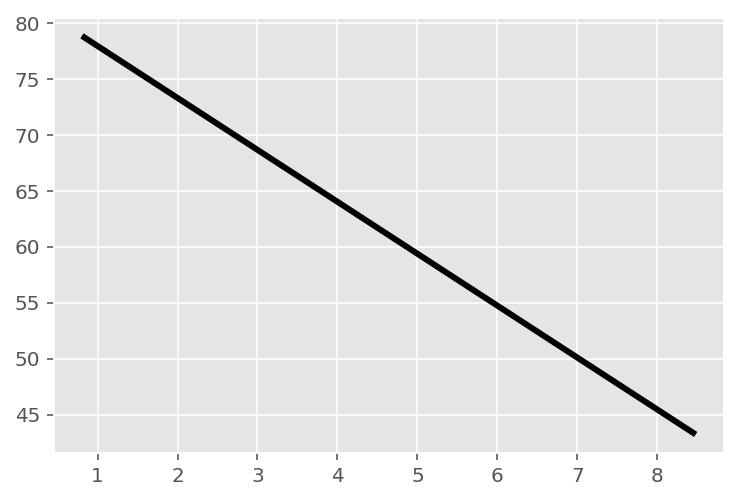

In [136]:

# from sklearn import linear_model
# Or
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

prediction_space = np.linspace(min(fertility), max(fertility)).reshape(-1,1)

reg.fit(fertility,life)

life_pred = reg.predict(prediction_space)

print(reg.score(fertility, life))

plt.plot(prediction_space, life_pred, color='black', linewidth=3)
plt.show()

In [141]:
# All-in regression

from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(fertility, life,
                                                   test_size=0.3,
                                                   random_state=42)
reg_all = LinearRegression()

reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

print("R^2: {}".format(reg_all.score(X_test, y_test)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error: {}".format(rmse))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

R^2: 0.6993214263212586
Root Mean Squared Error: 6.200458067403522


# CROSS-VALIDATION: Counter pitall of $R^2$
## Model performance depends on split, arbitrary
## Not signalling model's ability to generalise
### It max the amount of data used to train, during which model not only trained, but alose tested on all of data

## SOLUTION Parcours: 
1. Split into numerious FOLDS
2. Hold each fold as Train and rest as Test
3. Obtaining number of metrics of interests
4. With set of metrics, find interested measures
5. K-fold CV 

### Trade-off: computational burden

In [144]:
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(reg, fertility, life, cv=5)

print(cv_results)

np.mean(cv_results)

[0.75036089 0.78566668 0.62347642 0.67730297 0.60784524]


0.6889304410373277

# Computational cost as k rises

In [145]:
%timeit cross_val_score(reg, fertility, life, cv=3)
%timeit cross_val_score(reg, fertility, life, cv=10)

4.14 ms ± 291 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.6 ms ± 319 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# REGULARISED REGRESSION: large coeff can lead to OVERFITTING
## Solution: PENALISE large coeff !!!
## Model: RIDGE Regression:
### OLS Loss Function $ +\; \alpha\sum{coeff_i^2}$
### $\alpha$: parameter picked similarly to k in KNN
## HYPER-PARAMTER TUNING
### $\alpha$ controls model complexity
### $\alpha$ = 0: OLS
### $\alpha$ high leads to UNDERFITTING

In [146]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

0.6942268141276757

# LASSO Regression: 
## OLS + $\alpha\sum{|{coeff_i}|}$
## Aspect: used to select important features, shrinking lesser ones to 0 !!!
## IMPORTANT to singalling explaining power of features in ML

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


(506, 13)

(506,)

(506, 1)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_set_intercept',
 'alpha',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'l1_ratio',
 'max_iter',
 'normalize',
 'path',
 'positive',
 'precompute',
 'predict',
 'random_state',
 'score',
 'selection',
 'set_params',
 'sparse_coef_',
 'tol',
 'warm_start']

['__class__', '__delattr__', '__dir__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '_decision_function', '_get_param_names', '_preprocess_data', '_set_intercept', 'fit', 'get_params', 'path', 'predict', 'score', 'set_params']


['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_set_intercept',
 'alpha',
 'coef_',
 'copy_X',
 'dual_gap_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'l1_ratio',
 'max_iter',
 'n_iter_',
 'normalize',
 'path',
 'positive',
 'precompute',
 'predict',
 'random_state',
 'score',
 'selection',
 'set_params',
 'sparse_coef_',
 'tol',
 'warm_start']

[-8.74226739e-02  4.94859494e-02 -1.11148446e-02  0.00000000e+00
 -0.00000000e+00  2.80384471e+00  2.31361638e-04 -9.95073236e-01
  2.78803407e-01 -1.53456812e-02 -7.65558658e-01  9.70192995e-03
 -6.34946098e-01]


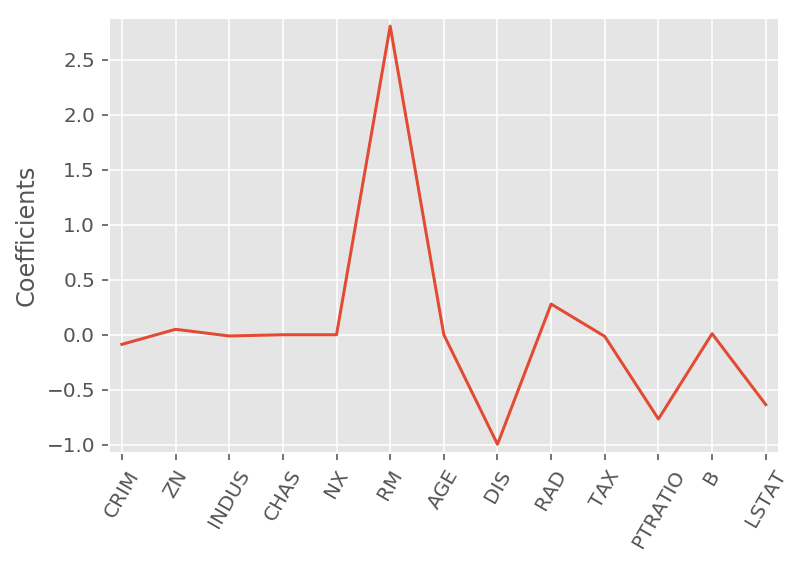

In [172]:
from sklearn.linear_model import Lasso

boston = pd.read_csv('Data_Folder/boston.csv')
boston.head()
X_boston = boston[names]
X_boston.head()
X_boston.shape
y_boston = boston.MEDV
y_boston = np.array(y_boston)
y_boston.shape
y_boston = y_boston.reshape(-1,1)
y_boston.shape


# lasso feature selection plotting
names = boston.drop('MEDV', axis=1).columns

lasso = Lasso(alpha=0.4)
lasso
# all of lasso methods
dir(lasso)
# all of which callable
print([method for method in dir(Lasso) if callable(getattr(Lasso, method))])

lasso_coeff = lasso.fit(X_boston, y_boston)
dir(lasso_coeff)

lasso_coeff = lasso_coeff.coef_
print(lasso_coeff)

_ = plt.plot(range(len(names)), lasso_coeff)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.margins(0.02)
plt.show()


# Lasso is great for FEATURE SELECTION, but RIDGE should be primary choice
## Lasso PENALTY = L1-norm of coefficients
## Ridge = L2-norm

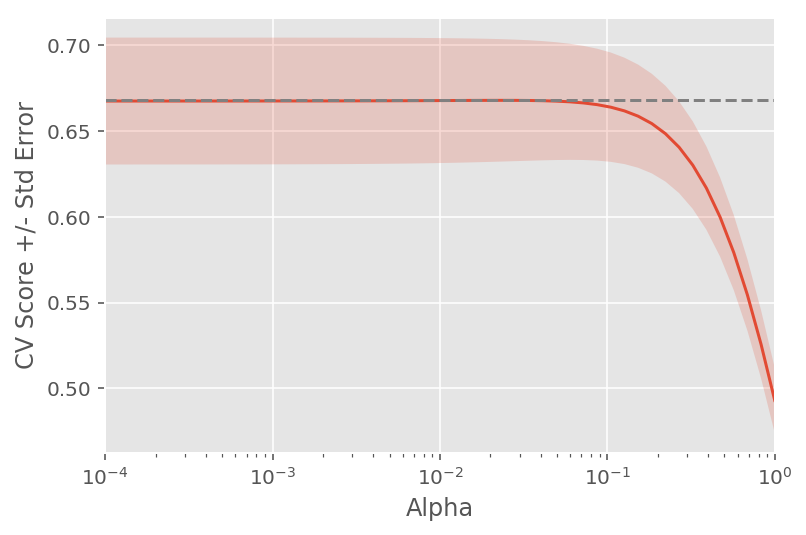

In [175]:
# def func to plot $R^2$ of varying $\alpha$

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    
    std_error = cv_scores_std / np.sqrt(10)
    
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='0.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

ridge = Ridge(normalize=True)

for alpha in alpha_space:
    ridge.alpha = alpha
    
    ridge_cv_scores = cross_val_score(ridge, fertility, life, cv=10)
    
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    ridge_scores_std.append(np.std(ridge_cv_scores))

display_plot(ridge_scores, ridge_scores_std)
    

# TUNING MODEL
## Accuracy NOT always best metric
1. e.g. Spam classif 99% real, 1% spam
## When one class is predominant, class imbalances

# CONFUSION MATRIX (binary classifier)
### True/False x Positive/Negative
### Accuracy = TP+TN / total
### MisRate = FP+FN / total or 1-Accuracy 'Error Rate'
### TP rate = TP/actualYES 'Sensitivity or RECALL'
### FP rate = FP/acutalNO
### Specificity = TN/actualNO or 1-FP Rate, when actually NO, rate of pred NO
### Precision = TP/PredYES, out of pred yes, rate of correctness
### Prevalence = actualYES/total, prevalence of YES
### F1 score = 2 * precision*recall / precision+recall (weighted avg of recall and precision)
### Cohen's Kappa: diff random pred and accuracy
### High precision: not many real emails pred as spam
### High recall: pred most spam correctly

![Image](https://i.stack.imgur.com/3eGlc.png)
![Image](https://i.imgur.com/uipmEwt.png)

In [182]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.93      0.93      0.93        15
          2       0.93      0.93      0.93        15

avg / total       0.96      0.96      0.96        45



# LOGISTIC Regression and ROC Curve
## Binary label of target var
## Cut off at 0.5, threshold, KNN applicable

In [199]:
diabetes = pd.read_csv('Data_Folder/diabetes.csv')
diabetes.head()
diabetes.info()
positive = diabetes['diabetes']
positive = np.array(positive)
positive.shape

diabetes = diabetes.drop(columns=['diabetes'])
diabetes.head()

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(diabetes, positive, 
                                                   test_size=0.4, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768,)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

[[174  32]
 [ 36  66]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.84       206
          1       0.67      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



# ROC (Receiver Operating Characteristic) Curve shows varying THRESHOLDS
## Plot TPR - FPR

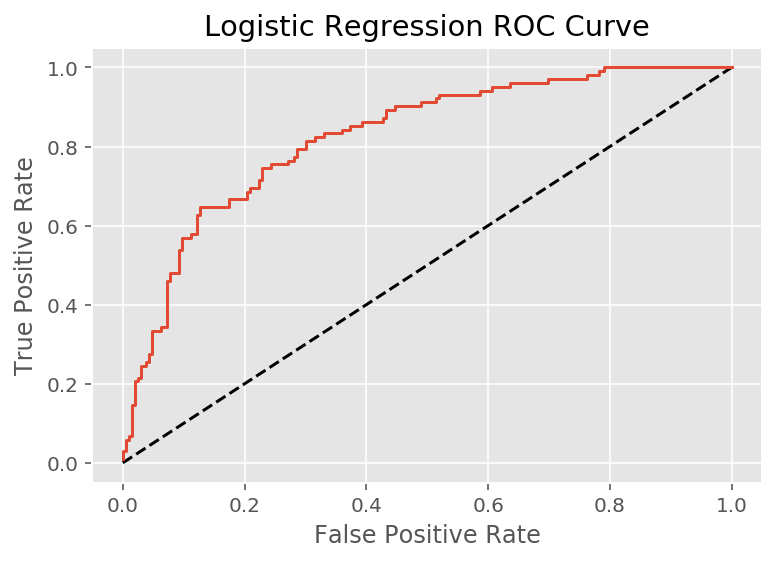

In [201]:
from sklearn.metrics import roc_curve

# obtaining probability estimates of all labels

y_pred_prob = logreg.predict_proba(X_test)[:,1] # extract only col=1, i.e. positive diabetes

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    # this tool is resticted to BINARY classification

_ = plt.plot([0,1], [0,1], 'k--')
_ = plt.plot(fpr, tpr, label='Logistic Regression')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Logistic Regression ROC Curve')
plt.show()



# SKL makes it very easy to try various models, since the paradigm applies to ALL Classifiers and regressors/estimators
## Train_Test_Split -> Instantiate -> Fit -> Predict -> Evaluation

# Classification-Report and Confusion-Matrix provide quantitative evaluation
# ROC visualises such evaluation
## Most SKL classifiers have .predict_proba() method returning prob(given sample = a class)

# PRECISION-RECALL curve: ROC, y-axis TruePositiveRate = RECALL
### Besides ROC, other visual eval such as Precision-Recall curve
### PPC DO NOT account True Negative
### When THRESHOLDs nearing 1, PRECISION = 1, because classifier is absolutely CERTAIN about prediction
### PRECISION undefined for a classifier with NO Positive Prediction, i.e. pred ALL as NOT diabetes
### RECALL = 1 means classifier with low threshold that ALL patient contracted diabetes were correctly labelled, costing many mislabelled NOT-diabetes
# Given ROC - can we extract a metric of interest ?
# AUC (area under curve): larger AUC the better the model !!!
### think of TPR at 1 and FPR at 0, AUC largest or perfect model

In [204]:
from sklearn.metrics import roc_auc_score

cv_auc = cross_val_score(logreg, diabetes, positive, cv=5, scoring='roc_auc')

print('AUC scores computed via 5-Fold cross-validation: {}'.format(cv_auc))

AUC scores computed via 5-Fold cross-validation: [0.7987037  0.80777778 0.81944444 0.86622642 0.85037736]


## Supposing a random binary classifier, 50% correct, ROC curve would be DIAGONAL LINE of TP/FP graph
## AUC = 0.5, if greater the better the model than random guessing, always a good sign !

# HYPER-PARAMETER TUNING: supercharge model, tuning parameter ($\alpha$ etc) fit best
## Linear Regression - choosing parameters
## Ridge/Lasso Regression - choosing $\alpha$
## KNN - choosing n_neigbours
## Hyperparameters CANNOT be learnt by fitting model !!!
## Fundamental key for good model - hyperparameter
## Fit all and choose best performing
## Essential to use CROSS-VALIDATION 'FOLDING' method

# GRID search 'cross-validation'

In [211]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1,50)}

knn= KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(iris.data, iris.target)
knn_cv.best_params_
knn_cv.best_score_

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'n_neighbors': 6}

0.98

# Skipping Ridge/Lasso, Logistic regression also has regularisation parameter: C - controlling 'inverse' of regularisation strength
## Large C -> OVERFITTING

In [212]:
c_space = np.logspace(-5, 8, 15)
c_space

param_grid = {'C': c_space}

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

logreg_cv.fit(diabetes, positive)

print('Tuned Logistic Regression Parameters: {}'.format(logreg_cv.best_params_))
print('Best score is {}'.format(logreg_cv.best_score_))

array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.7708333333333334


# GRIDSEARCH CV can be computationally costly, esp. if large hyperparamter space and multiple 
## RandomizedSearchCV permets a fixed number of trials sampled from specificed ProbaDist
## New model: DECISION TREE, just like KNN, LinearReg, LogReg, DT will have .fit() and predict.()

In [230]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'max_depth': [3, None],
             'max_features': randint(1,9),
             'min_samples_leaf': randint(1,9),
             'criterion': ['gini', 'entropy']}

tree = DecisionTreeClassifier()

tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

tree_cv.fit(diabetes, positive)

print('Tuned Decision Tree Parameters: {}'.format(tree_cv.best_params_))
print('Best score is {}'.format(tree_cv.best_score_))

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1541b1d0>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1541b358>, 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1}
Best score is 0.7161458333333334


# NOTE!! RandomizedSearchCV will NEVER beat GridSearchCV, but saves computime

# HOLD-OUT dataset for validating model performance on 'pristine' data
## Split into training set and hold-out set at onset
## Tune model's hyperparameters on training, then eval on hold-out

# Besides C, LogReg has 'penalty' hyperParam 'L1' or 'L2' regularisation

In [232]:
param_grid = {'C': c_space,
             'penalty': ['l1', 'l2']}

X_train, X_test, y_train, y_test = train_test_split(diabetes, positive, test_size=0.4, random_state=42)

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

logreg_cv.fit(X_train, y_train)

print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261


# Lasso used L1 penalty to regularise, while Ridge L2;
# Another type of regularised Regression is ELASTIC NET - penalty term is a linearCombo of both:
## $a*L1+b*L2$
## 'l1_ratio' = 1 equivalent of L1, any lower gets mix of L1 and L2

In [233]:
from sklearn.linear_model import ElasticNet

X_train, X_test, y_train, y_test = train_test_split(fertility, life, test_size=0.4, random_state=42)

l1_space = np.linspace(0, 1, 30)

param_grid = {'l1_ratio': l1_space}

elastic_net = ElasticNet()

gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

gm_cv.fit(X_train, y_train)

y_pred = gm_cv.predict(X_test)

r2 = gm_cv.score(X_test, y_test)

mse = mean_squared_error(y_test, y_pred)

print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

/Users/Ocean/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Ocean/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Ocean/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Ocean/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'l1_ratio': array([0.     , 0.03448, 0.06897, 0.10345, 0.13793, 0.17241, 0.2069 ,
       0.24138, 0.27586, 0.31034, 0.34483, 0.37931, 0.41379, 0.44828,
       0.48276, 0.51724, 0.55172, 0.58621, 0.62069, 0.65517, 0.68966,
       0.72414, 0.75862, 0.7931 , 0.82759, 0.86207, 0.89655, 0.93103,
       0.96552, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Tuned ElasticNet l1 ratio: {'l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.7040945018283182
Tuned ElasticNet MSE: 37.92600362087368


# PIPELINE

### Custom Transformer and Chain Pipeline

In [ ]:
# Some Cleaning
import re
from nltk.corpus import stopwords

stopWords = set(stopwords.words('english'))

#creating a function to encapsulate preprocessing, to mkae it easy to replicate on  submission data
def processing(df):
    #lowering and removing punctuation
    df['processed'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]','', x.lower()))
    
    #numerical feature engineering
    #total length of sentence
    df['length'] = df['processed'].apply(lambda x: len(x))
    #get number of words
    df['words'] = df['processed'].apply(lambda x: len(x.split(' ')))
    df['words_not_stopword'] = df['processed'].apply(lambda x: len([t for t in x.split(' ') if t not in stopWords]))
    #get the average word length
    df['avg_word_length'] = df['processed'].apply(lambda x: np.mean([len(t) for t in x.split(' ') if t not in stopWords]) if len([len(t) for t in x.split(' ') if t not in stopWords]) > 0 else 0)
    #get the average word length
    df['commas'] = df['text'].apply(lambda x: x.count(','))

    return(df)

df = processing(df)

# Get features
features= [c for c in df.columns.values if c  not in ['id','text','author']]
numeric_features= [c for c in df.columns.values if c  not in ['id','text','author','processed']]
target = 'author'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.33, random_state=42)

# 2 custom transformer for text and numerics
from sklearn.base import BaseEstimator, TransformerMixin

class TextSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on text columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    

# Pipeline text
from sklearn.feature_extraction.text import TfidfVectorizer

text = Pipeline([
                ('selector', TextSelector(key='processed')),
                ('tfidf', TfidfVectorizer( stop_words='english'))
            ])

text.fit_transform(X_train)

# Pipelien numerics
from sklearn.preprocessing import StandardScaler

length =  Pipeline([
                ('selector', NumberSelector(key='length')),
                ('standard', StandardScaler())
            ])

length.fit_transform(X_train)


# Apply to each col
words =  Pipeline([
                ('selector', NumberSelector(key='words')),
                ('standard', StandardScaler())
            ])
words_not_stopword =  Pipeline([
                ('selector', NumberSelector(key='words_not_stopword')),
                ('standard', StandardScaler())
            ])
avg_word_length =  Pipeline([
                ('selector', NumberSelector(key='avg_word_length')),
                ('standard', StandardScaler())
            ])
commas =  Pipeline([
                ('selector', NumberSelector(key='commas')),
                ('standard', StandardScaler()),
            ])

# Union them as one transformer
from sklearn.pipeline import FeatureUnion

feats = FeatureUnion([('text', text), 
                      ('length', length),
                      ('words', words),
                      ('words_not_stopword', words_not_stopword),
                      ('avg_word_length', avg_word_length),
                      ('commas', commas)])

feature_processing = Pipeline([('feats', feats)])
feature_processing.fit_transform(X_train)

# Model
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

pipeline.fit(X_train, y_train)

preds = pipeline.predict(X_test)
np.mean(preds == y_test)

# Apply to test data using above pipeline
submission = pd.read_csv('../input/test.csv')

#preprocessing
submission = processing(submission)
predictions = clf.predict_proba(submission)

preds = pd.DataFrame(data=predictions, columns = clf.best_estimator_.named_steps['classifier'].classes_)

#generating a submission file
result = pd.concat([submission[['id']], preds], axis=1)
result.set_index('id', inplace = True)

## Preprocessing Data:
1. Cat feature - sklearn will not accept cat features by defaults
2. Encode cat numerically - DUMMY VARIABLES

**OneHotEncoder() # sklearn**

**get_dummies() # pands on DF, auto-detects and creates cat dummies**

In [234]:
df = pd.read_csv('Data_Folder/auto-mpg.csv')

df_origin = pd.get_dummies(df)
df_origin.head()

df_origin = df_origin.drop('origin_Asia', axis=1)

,mpg,cyl,displ,hp,weight,accel,yr,size,origin_Asia,origin_Europe,...,name_vw rabbit c (diesel),name_vw rabbit custom,color_black,color_blue,color_green,color_purple,color_red,marker_o,marker_s,marker_x
0,18.0,6,250.0,88,3139,14.5,71,27.370336,0,0,...,0,0,0,0,0,0,1,1,0,0
1,9.0,8,304.0,193,4732,18.5,70,62.199511,0,0,...,0,0,0,0,1,0,0,1,0,0
2,36.1,4,91.0,60,1800,16.4,78,9.000000,1,0,...,0,0,0,1,0,0,0,0,0,1
3,18.5,6,250.0,98,3525,19.0,77,34.515625,0,0,...,0,0,0,0,0,0,1,1,0,0
4,34.3,4,97.0,78,2188,15.8,80,13.298178,0,1,...,0,0,0,1,0,0,0,0,1,0


In [240]:
df_region = pd.get_dummies(df, drop_first=True)
df_region.columns

# MISSING (.info() not enough for '0' or other null entries)

# diabetes.insulin.replace(0, np.nan, inplace=True)

# df = df.dropna()

# IMPUTATION

from sklearn.preprocessing import Imputer

imp = Imputer(missing_values="NaN", strategy='mean', axis=0)
imp.fit(df_sample)
X = imp.transform(df_sample)

# Note the parcours of imputer from sklearn

Index(['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'size',
       'origin_Europe', 'origin_US',
       ...
       'name_vw pickup', 'name_vw rabbit', 'name_vw rabbit c (diesel)',
       'name_vw rabbit custom', 'color_blue', 'color_green', 'color_purple',
       'color_red', 'marker_s', 'marker_x'],
      dtype='object', length=316)

NameError: name 'df_sample' is not defined

In [137]:
# PIPELINE module

from sklearn.pipeline import Pipeline

steps = [('imputation', imp),
        ('logistic_regression', logreg)]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

pipeline.score(X_test, y_test)

NameError: name 'imp' is not defined

# ALL STEP BUT LAST MUST BE A TRANSFORMER; THE LAST MUST BE AN ESTIMATOR (classifier, regressor, transformer)

## Real missing data can be messy, all kinds of entries; using NaN for efficiency and utility of pandas methods .fillna() or Imputer()

In [250]:
vote[vote == '?'] = np.nan
vote.head(10)

print(vote.isnull().sum())

vote.shape
vote = vote.dropna()
vote.shape


,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
18,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
22,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
24,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y
25,democrat,y,n,y,n,n,n,y,y,y,n,y,n,n,n,y,y
26,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
27,republican,y,n,n,y,y,n,y,y,y,n,n,y,y,y,n,y
28,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
29,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,n


republican    0
n             0
y             0
n.1           0
y.1           0
y.2           0
y.3           0
n.2           0
n.3           0
n.4           0
y.4           0
?             0
y.5           0
y.6           0
y.7           0
n.5           0
y.8           0
dtype: int64


(232, 17)

(232, 17)

# Imputation strategy needs 'domain savoir', or often mean/median of row/col
## Many steps in building a model, from creating training and testing sets, to fitting a classifier or regressor to tuning its params, to evaluating performance on new data
## Imputation can be seen as debut, its entirety a 'pipeline'
## SKL proffers pipeline constructor allowing tying into workflow

# 3 classifiers thus far: KNN, LogReg, Decision Tree

# 4th: Support Vector Machine (SVM)

from sklearn.svm import SVC

imp = Imputer(missing_value='NaN', strategy='most_frequent', axis=0)

clf = SVC()

steps = [('imputation', imp),
         ('SVM', clf)]

In [252]:
from sklearn.svm import SVC

steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(diabetes, positive, test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

Pipeline(memory=None,
     steps=[('imputation', Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
    verbose=0)), ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

             precision    recall  f1-score   support

          0       0.65      1.00      0.79       151
          1       0.00      0.00      0.00        80

avg / total       0.43      0.65      0.52       231



/Users/Ocean/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# CENTERING AND SCALING: motivation - many models use some form of distance to inform them features on large scales can unduly shape outcome
## E.g. KNN uses distance explicityly in predicting
## Feature on similar scale: 'normalising' or scaling and centering

# Method: standardisation (x-mean/var) (0,1) or Subtract min and divid by range (min = 0 and max = 1), else Normalise data ranges (-1 to 1)


In [253]:
from sklearn.preprocessing import scale

X_scaled = scale(iris.data)
np.mean(iris.data), np.std(iris.data)
np.mean(X_scaled), np.std(X_scaled)

(3.4636666666666662, 1.974000985027335)

(-1.3263464400855204e-15, 1.0)

```python
from sklearn.preprocessing import StandardScaler
steps = []
pipeline = Pipeline(steps)
train_test_split()
knn_scaled = pipeline.fit()
y_pred = pipeline.predict()
accuracy_score(y_test, y_pred)
```

# CV and scaling in a pipeline

```python
steps = []
pipeline = Pipeline(steps)
parameters = {knn__n_neighbors = np.arange(1,50)}
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit()
y_pred = cv.predict()
print(cv.best_params_)
print(cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

# scaling not always needed, such as binary features
# as to efficacy, proof is in the pudding !
```

In [264]:
from sklearn.preprocessing import StandardScaler

steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_scaled = pipeline.fit(X_train, y_train)

knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 1.0
Accuracy without Scaling: 1.0


# EN SOMME: PIPELINE FOR CLASSIFICATION
## SVC tuning on C and 'gamma', C analogous to LogReg regularisation strength
## 'gamme' controls 'kernel coeff' (beyond scope)

In [267]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters, cv=3)
# Fit to the training set
cv.fit(X_train, y_train)
# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)
# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'SVM__C': [1, 10, 100], 'SVM__gamma': [0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Accuracy: 0.9333333333333333
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.83      0.91        12
          2       0.78      1.00      0.88         7

avg / total       0.95      0.93      0.93        30

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.1}


In [268]:
# Pipeline for regression: imputation, scale, fit ElasticNet, tune

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]
# Create the pipeline: pipeline 
pipeline = Pipeline(steps)
# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid=parameters)
# Fit to the training set
gm_cv.fit(X_train, y_train)
# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))


/Users/Ocean/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('imputation', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elasticnet', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'elasticnet__l1_ratio': array([0.     , 0.03448, 0.06897, 0.10345, 0.13793, 0.17241, 0.2069 ,
       0.24138, 0.27586, 0.31034, 0.34483, 0.37931, 0.41379, 0.44828,
       0.48276, 0.51724, 0.55172, 0.58621, 0.62069, 0.65517, 0.68966,
       0.72414, 0.75862, 0.7931 , 0.82759, 0.86207, 0.89655, 0.93103,
       0.96552, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.8721753580065421


# CASE: SCHOOL BUDGET CLASSIFICATION
## Goal: build ML model to auto-evaluating budgeting
### Labels are given in each item in budget DB, => SL problem
1. over 100 TARGET variables!
2. Classification problem
3. Pre_K means NO_LABEL, Non PreK, Prek
4. impossible for human labelling
### HUMAN LOOP ML system: Model gives Set of Proba(Target) to prioritise human focus
6. likelihood of classification of items

## Model predciting Proba for each possible label by relying on some correctly labelled data
- Type: Supervised, classification (labelled to train)
- Multi-class-multi-label classification, with 9 broad CAT of many sub-label instances

## datatypes
1. convert 'cat' into actual CAT:
df['label'].astype('category') (ONLY on pd.Series)
2. Dummy: dummies = pd.get_dummies(df[['label']], prefix_sep='_')
3. Lambda usage in batch encoding (on PD DF) labels as CAT
> - cat_label = lambda x: x.astype('category')
> - df.label = df[['label']].apply(cat_label)

> NOTE: Why .apply(pd.Series.nunique) can be used on a pandas.core.frame.DataFrame object ? Because pd.Series.nunique as type is a FUNCTION, and ...DataFrame class has in fact the 'apply' method callable.

> - num_unique_labels = df[LABEL].apply(pd.Series.nunique); 
> - num_unique_labels.plot(kind='bar') # to visualise distribution

# Measure of success: Log Loss
## A loss function, measuring error (unlike accuracy)
## Log Loss for BINARY classification
* Actual value: y={1=yes, 0=no}
* Prediction (proba value = 1): p
### $logloss = -\frac{1}{N} \sum_{i=1}^N [\,y_i log(p_i)+(1-y_i)log(1-p_i)\,]$
> better modestly unsure than confidently wrong

In [9]:
# writing log loss function

import numpy as np

def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between predicted and actual
        when these are 1D arrays
        
        :param predicted: predicted proba as floats 0-1
        :param actual: acutal binary labels, 0 or 1
        :param eps (facultatif): log(0) is inf, offsetting within"""
    
    predicted = np.clip(predicted, eps, 1-eps)
    
    loss = -1 * np.mean(actual * np.log(predicted)
                       + (1-actual) * np.log(1-predicted))
    return loss

# exmaple

compute_log_loss(predicted=0.9, actual=0)
compute_log_loss(predicted=0.5, actual=1)

2.302585092994046

0.6931471805599453

## Ideas on Building ML model
1. Quick better than complex - using basic methods to test signal extraction
2. Train basic model on numeric data only - raw to pred quick!
3. Multi-class logistic regression: format pred to csv and compute log loss function
### In this case, TSP doesn't work due to disproportionate data
1. Solution: StratifiedShuffleSplit in SKL, BUT this only works in SINGLE TARGET variable - ours many!!
2. Self-made solution: multilabel_train_test_split()

## Splitting data
**1. data_to_train = df[NUMERIC_COL].fillna(-1000) # for responding distinctly than 0**

**2. labels_to_use = pd.get_dummies(df[LABELS])**

**3. xxyy = multilabel_train_test_split(data_to_train, labels_to_use, size=0.2, seed=123)**

In [10]:
# multilabel_split.py

from warnings import warn

import numpy as np
import pandas as pd

def multilabel_sample(y, size=1000, min_count=5, seed=None):
    """ Takes a matrix of binary labels 'y' and returns the
        indices for a sample of size 'size' if 'size' > 1
        or 'size' * len(y) if size <= 1
        
        The sample is guaranteed to have > 'min_count' of each label
        """
    try: 
        if (np.unique(y).astype(int) != np.array([0,1])).all():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')
        
    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough samples. Change min_count if necessary')
    
    if size <= 1:
        size = np.floor(y.shape[0] * size)
        
    if y.shape[1] * min_count > size:
        msg = 'Size less than number of cols * min_count, returning {} items instead of {}.'
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count
        
    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))
    
    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])
        
    sample_idxs = np.array([], dtype=choices.dtype)
    
    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])
    
    sample_idxs = np.unique(sample_idxs)
    
    # now taht we have at least min_count of each, just random sample
    sample_count = int(size - sample_idxs.shape[0])
    
    # get sample_count indices from remaining chocies
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices, size=sample_count, replace=False)
    
    return np.concatenate([sample_idxs, remaining_sampled])

def multilabel_sample_dataframe(df, labels, size, min_count=5, seed=None):
    """ Tkaes a df returns a sample of size where all
        classes in binary matrix 'labels' are represented at 
        least 'min_count' times"""
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]

def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix X and a label matrix Y and
        returns (XXYY) where all classes in Y are rep at least 'min_count'
        times"""
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])
    
    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    
    train_set_idxs = np.setdiff1d(index, test_set_idxs)
    
    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask
    
    return (X[train_set_mask], X[test_set_mask], 
           Y[train_set_mask], Y[test_set_mask])



## Training Model
### from sklearn.multiclass import OneVsRestClassifier
### clf = OneVsRestClassifier(LogisticRegression())

## OneVsRestClassifier:
### - Treats each col of target independently
### - Fits a separate classifier for each of the col

## Prediction
> **predictions = clf.predict_proba(holdout[NUMERIC].fillna(-1000))**

## After prediction, saving prediction to CSV with edition

> **prediction_df = pd.DataFrame(
columns=pd.get_dummies(df[LABELS], prefix_sep='_ _').columns, index=holdout.index, data=predictions)**

> **prediction_df.to_csv('prediction.csv')**

> **score = score_submission(pred_path='prediction.csv')**

# INTRO NLP: test, doc, speech, ...
## <a href=https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.htmlTokenization>TOKENISATION</a> - splitting string into List of strings
## e.g. 'N....' to 'Nature', 'Language', 'Processing'
### tokenize on whitespace for example, or sep by ' '
### or 'hyphen -' number of tokens = list of strings

## Bag of Words - numCount of words appearance
### This disregard word order or semantics
## Instead: N-gram
### e.g. 2-grams = Petro vend, vend fuel, feul and, etc.
> e.g. 'Title I - Disadvantaged Children/Targeted Assistance' 1-gram-tokenised on punc => 

# Transforming 'list of string' into N-Grams object (2 ways)

In [67]:
from nltk import ngrams

sentence = 'this is a foo bar sentences and i want to ngramize it'
n = 3

sixgrams = ngrams(sentence.split(), n)

for grams in sixgrams:
  print(grams)


('this', 'is', 'a')
('is', 'a', 'foo')
('a', 'foo', 'bar')
('foo', 'bar', 'sentences')
('bar', 'sentences', 'and')
('sentences', 'and', 'i')
('and', 'i', 'want')
('i', 'want', 'to')
('want', 'to', 'ngramize')
('to', 'ngramize', 'it')


In [118]:
# pythonic, elegant and fast ngram 

def find_ngrams(input_list, n):
    return zip(*[input_list[i:] for i in range(n)])

one_grams = ['petro', 'vend', 'fuel', 'and', 'fluids']


# summing number of grams from set of Ns - USING LIST COMPREHENSION

sum([len(list(i)) for i in list(find_ngrams(one_grams, x) 
                              for x in [1,2,3])])



12

# SKL bag-of-word function - sklearn.feature_extraction.text.CountVectorizer()
1. Tokenises all strings
2. Builds a 'vocabulary'
3. Counts the occurrences of each token in the vocab

## REGULAR EXPRESSION setup: TOKENS_BASIC = '\\S+(?=\\s+)'

# Course Scripts - due to missing of dataset
Create token pattern: ```alphanumeric = '[A-Za-z0-9]+(?=\\s+)'```
Fillmissing ```df.Position_Extra.fillna('', inplace=True)```

Init vectoriser: ```vec_alphanumeric = CountVectorizer(token_pattern = alphanumeric)```

# To include a range of N-gram for improvement: add input **ngram_range=(1,2)**

Fit data: ```vec_alphanumeric.fit(df.Position_Extra)```

Print:
```msg = "There are {} tokens in Position_Extra if we split on non-alpha numeric"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:15])```

> There are 123 tokens in Position_Extra if we split on non-alpha numeric

> ['1st', '2nd', '3rd', 'a', 'ab', 'additional', 'adm', 'administrative', 'and', 'any', 'art', 'assessment', 'assistant', 'asst', 'athletic']

# CountVectorizer expects each row as a SINGLE string (above case already a SINGLE COL)
## NOW needs to combine all rows, or list of string into ONE

In [136]:
def combine_text_columns(data_frame, to_drop= NUMERIC_COLUMNS + LABELS):
    """ CONVERTS ALL TEXT IN EACH ROW OF DATA_FRAME TO SINGLE VECTOR"""
    
    # drop non-text col
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    
    # drop non-text data
    text_data = data_frame.drop(to_drop, axis=1)
    
    # fill missing with blank
    text_data.fillna('', inplace=True)
    
    # join all items in a row with a space between
    return text_data.apply(lambda x: ' '.join(x), axis=1)

NameError: name 'NUMERIC_COLUMNS' is not defined

# Import the CountVectorizer
```from sklearn.feature_extraction.text import CountVectorizer```

# Create the basic token pattern
```TOKENS_BASIC = '\\S+(?=\\s+)'```

# Create the alphanumeric token pattern
```TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'```

# Instantiate basic CountVectorizer: vec_basic
```vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)```

# Instantiate alphanumeric CountVectorizer: vec_alphanumeric
```vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)```

# Create the text vector
```text_vector = combine_text_columns(df)```

# Fit and transform vec_basic

``` vec_basic.fit_transform(text_vector) ```

# Print number of tokens of vec_basic
``` print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))```

# Fit and transform vec_alphanumeric
``` vec_alphanumeric.fit_transform(text_vector) ```

# Print number of tokens of vec_alphanumeric
``` print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names()))) ```

> <script.py> output:
    There are 1405 tokens in the dataset
    There are 1117 alpha-numeric tokens in the dataset

# PIPELINE - encapsulating all into repeatable objects 
Sequentially apply a list of transforms and a final estimator.
Intermediate steps of the pipeline must be 'transforms', that is, they
must implement fit and transform methods.
The final estimator only needs to implement fit.
The transformers in the pipeline can be cached using ``memory`` argument.

The purpose of the pipeline is to assemble several steps that can be
cross-validated together while setting different parameters.
For this, it enables setting parameters of the various steps using their
names and the parameter name separated by a '__', as in the example below.
A step's estimator may be replaced entirely by setting the parameter
with its name to another estimator, or a transformer removed by setting
to None.

### Parameters
**steps : list
    List of (name, transform) tuples (implementing fit/transform) that are
    chained, in the order in which they are chained, with the last object
    an ESTIMATOR.**

**memory : None, str or object with the joblib.Memory interface, optional
    Used to cache the fitted transformers of the pipeline. By default,
    no caching is performed. If a string is given, it is the path to
    the caching directory. Enabling caching triggers a clone of
    the transformers before fitting. Therefore, the transformer
    instance given to the pipeline cannot be inspected
    directly. Use the attribute ``named_steps`` or ``steps`` to
    inspect estimators within the pipeline. Caching the
    transformers is advantageous when fitting is time consuming.**

Attributes

named_steps : bunch object, a dictionary with attribute access
    Read-only attribute to access any step parameter by user given name.
    Keys are step names and values are steps parameters.

Example

```
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
```
```
generate some data to play with
X, y = samples_generator.make_classification(
    n_informative=5, n_redundant=0, random_state=42)
```
ANOVA SVM-C
```
anova_filter = SelectKBest(f_regression, k=5)
clf = svm.SVC(kernel='linear')
anova_svm = Pipeline([('anova', anova_filter), ('svc', clf)])
```

You can set the parameters using the names issued
For instance, fit using a k of 10 in the SelectKBest
and a parameter 'C' of the svm
```
anova_svm.set_params(anova__k=10, svc__C=.1).fit(X, y)
```

In [138]:
pl = Pipeline([
    ('clf', OneVsRestClassifier(LogisticRegression()))
])

# Preprocessing NaN missing data - include Imputer

pl = Pipeline([
    ('imp', Imputer()),
    ('clf', OneVsRestClassifier(LogisticRegression()))
])

NameError: name 'OneVsRestClassifier' is not defined

# HOW TO DEAL WITH 2 DIFFERENT STEPS - (1) VECTORISER ON TEXT DATA & (2) NORMAL LOGISTIC REG ON NUMERIC DATA
# SOLUTION: FunctionTransformer() and FeatureUnion()

## FunctionTransformer() - turn python func into object Pipeline can interpret
1. 

``` XXyy = train_test_split(sample_df[['numeric', 'with_missing', 'text']], pd.get_dummies(sample_df['label']), random_state=2) ```

2. 

``` from sklearn.preprocessing import FunctionTransformer ```

``` from sklearn.pipeline import FeatureUnion ```

3. 2 transformer objects

``` get_text = FunctionTransformer(lambda x: x['text'], validate=False) ```

``` get_numeric = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False) ```

# FeatureUnion joins separate Numeric and Text Features into SINGLE ARRAY

``` 
union = FeatureUnion([
    ('numeric', numeric_pipeline),
    ('text', text_pipeline) ])
```

# ENSEMBLE
## First, set 2 separate PIPELINEs for text and numeric, using FunctionTransformer()
```
numeric_pipeline = Pipeline([
    ('selector', get_numeric)
    ('imputer', Imputer())
    ])
```
```
text_pipeline = Pipeline([
    ('selector', get_text)
    ('vectorizer', CountVectorizer())
    ])
```
## This results in numeric features and text features separately
```
pl = Pipeline([
    ('union', FeatureUnion([
        ('numeric', numeric_pipeline),
        ('text', text_pipeline)
    ])),
    ('clf', OneVsRestClassifier(LogisticRegression()))
    ])
```

### Any step in the pipeline must be an object that implements the FIT and TRANSFORM methods. The **FunctionTransformer** creates an object with these methods out of any Python function that you pass to it. We'll use it to help select subsets of data in a way that plays nicely with pipelines.

### You are working with **numeric data that needs imputation**, and **text data that needs to be converted into a bag-of-words.** You'll create functions that separate the text from the numeric variables and see how the .fit() and .transform() methods work.

# In the end, you'll still have only two high-level steps in your pipeline: preprocessing and model instantiation. 
# The difference is that the first preprocessing step actually consists of a pipeline for numeric data and a pipeline for text data. 
# The results of those pipelines are joined using FeatureUnion().

In [139]:
# another way of wrapping pipelines

# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Split using ALL data in sample_df
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing', 'text']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )

# Instantiate nested pipeline: pl
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all data: ", accuracy)


NameError: name 'train_test_split' is not defined

## The only change for CASE is replace sample_df['text'] (a single col) with previously combined text col 'combined_test_columns'
> not sure why spliting X (data) and y (target) simply by Text/non-text...

> dummy_lables = pd.get_dummies(df[LABELS])

> XXyy = Multilabel_train_test_split(df[NON_LABELS], dummy_labels, 0.2)

> NON_LABELS = [c for c in df.columns if c not in LABELS]

## Finish up by:
```
1. reading holdout dataset 
2. predicitons = pl.predict_proba(holdout)
3. predictions = pd.DataFrame(columns=pd.get_dummies(df[LABELS].columns, index=holdout.index, data=predictions)
4. prediction_df.to_csv('predictions.csv')
5. score = score_submission(pred_path='predictions.csv')
```

# New features:
## These have been added in order to account for the fact that you're using a reduced-size sample of the full dataset in this course. To make sure the models perform as the expert competition winner intended, we have to apply a **dimensionality reduction** technique, which is what the **dim_red** step does, and we have to **scale** the features to lie between -1 and 1, which is what the scale step does.

## The dim_red step uses a scikit-learn function called **SelectKBest()**, applying something called the **chi-squared test to select the K "best" features**. The scale step uses a scikit-learn function called **MaxAbsScaler() in order to squash the relevant features into the interval -1 to 1.**

In [140]:
# Import pipeline
from sklearn.pipeline import Pipeline

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Import other preprocessing modules
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import chi2, SelectKBest

# Select 300 best features
chi_k = 300

# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion

# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern==TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

NameError: name 'combine_text_columns' is not defined

# Learn from winning expert: statistical tools: interactive terms
## Bigram used, but what if 'English teach for 2nd grade & 2nd grade - budget for English teacher'
## Interactive terms mathematically describe when tokens appear together !

## $\beta_1 x_1 + \beta_2 x_2 + \beta_3 (x_1 * x_2)$
> introducing 'interactive variable' x3 for common appearance of x1 and x2 (i.e. x3 = 1 if x1=x2=1)
```
from sklearn.preprocessing import PolynomialFeatures
```



In [145]:
from sklearn.preprocessing import PolynomialFeatures

x = pd.DataFrame(data=
                 {'x1':(0,1),
                 'x2': (1,1)})
x

interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

interaction.fit_transform(x)

    # the new interactive_term, col=3, is added
    # BIAS TERM allows non-zero value of y when x = 0, the intercept


,x1,x2
0,0,1
1,1,1


array([[0., 1., 0.],
       [1., 1., 1.]])

## The number of interactive terms grow EXPONENTIALLY; vectoriser saves memory using sparse matrix, BUT PolynomialFeature is not compatible; self-made sparse loaded ``` SparseInteractions(degree=2).fit_transform(x).toarray()```

In [146]:
from itertools import combinations

import numpy as np
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin


class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)

        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])

        spi = self._create_sparse_interactions(X)
        return spi

    def get_feature_names(self):
        return self.feature_names

    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()

        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)

                # get column multiplications value
                out = X[:, col_ixs[0]]
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

# add new step into pipeline ('int', SparseInteractions(degree=2))

# Winning class of model is just Logistical Regression.....jaw-dropping! 
## Much more important to preprocessing data and prepare the right FEATURES + implementation TRICKS!
## NLP: range of n-grams, punctuation tokenisation
## Stats: Interaction terms
## Computation: Hashing Trick

# So Hashing particularly useful for large features (kind of DimRed) - HASHING a way to reduce memory burden -> hash functions limits possible outputs, fixing array size '"possible join use of the same hash by multiple features, without lossing much accuracy on real world problems"

In [148]:
# Import the hashing vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Instantiate the winning model pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     non_negative=True, norm=None, binary=False,
                                                     ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

NameError: name 'get_numeric_data' is not defined

# EXAMPLE

## Plotting PCA + SGDClassifier Accuracy

Best parameter (CV score=0.923):
{'logistic__alpha': 0.01, 'pca__n_components': 64}


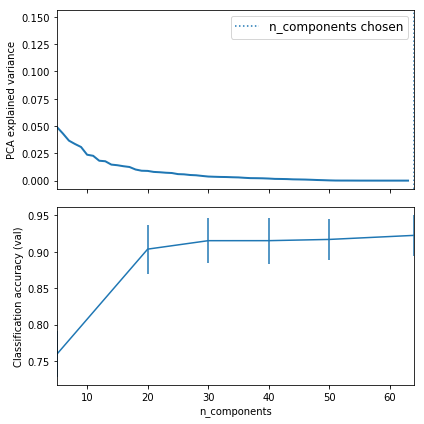

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
logistic = SGDClassifier(loss='log', penalty='l2', early_stopping=True,
                         max_iter=10000, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5,
                      return_train_score=False)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.tight_layout()
plt.show()

## Clustering Text using K-Means

```python
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Lars Buitinck
# License: BSD 3 clause

from __future__ import print_function

from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

import numpy as np


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

# parse commandline arguments
op = OptionParser()
op.add_option("--lsa",
              dest="n_components", type="int",
              help="Preprocess documents with latent semantic analysis.")
op.add_option("--no-minibatch",
              action="store_false", dest="minibatch", default=True,
              help="Use ordinary k-means algorithm (in batch mode).")
op.add_option("--no-idf",
              action="store_false", dest="use_idf", default=True,
              help="Disable Inverse Document Frequency feature weighting.")
op.add_option("--use-hashing",
              action="store_true", default=False,
              help="Use a hashing feature vectorizer")
op.add_option("--n-features", type=int, default=10000,
              help="Maximum number of features (dimensions)"
                   " to extract from text.")
op.add_option("--verbose",
              action="store_true", dest="verbose", default=False,
              help="Print progress reports inside k-means algorithm.")

print(__doc__)
op.print_help()


def is_interactive():
    return not hasattr(sys.modules['__main__'], '__file__')


# work-around for Jupyter notebook and IPython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)


# #############################################################################
# Load some categories from the training set
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
# Uncomment the following to do the analysis on all the categories
# categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]

print("Extracting features from the training dataset "
      "using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    if opts.use_idf:
        # Perform an IDF normalization on the output of HashingVectorizer
        hasher = HashingVectorizer(n_features=opts.n_features,
                                   stop_words='english', alternate_sign=False,
                                   norm=None, binary=False)
        vectorizer = make_pipeline(hasher, TfidfTransformer())
    else:
        vectorizer = HashingVectorizer(n_features=opts.n_features,
                                       stop_words='english',
                                       alternate_sign=False, norm='l2',
                                       binary=False)
else:
    vectorizer = TfidfVectorizer(max_df=0.5, max_features=opts.n_features,
                                 min_df=2, stop_words='english',
                                 use_idf=opts.use_idf)
X = vectorizer.fit_transform(dataset.data)

print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print()

if opts.n_components:
    print("Performing dimensionality reduction using LSA")
    t0 = time()
    # Vectorizer results are normalized, which makes KMeans behave as
    # spherical k-means for better results. Since LSA/SVD results are
    # not normalized, we have to redo the normalization.
    svd = TruncatedSVD(opts.n_components)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)

    X = lsa.fit_transform(X)

    print("done in %fs" % (time() - t0))

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))

    print()


# #############################################################################
# Do the actual clustering

if opts.minibatch:
    km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000, verbose=opts.verbose)
else:
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,
                verbose=opts.verbose)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()


if not opts.use_hashing:
    print("Top terms per cluster:")

    if opts.n_components:
        original_space_centroids = svd.inverse_transform(km.cluster_centers_)
        order_centroids = original_space_centroids.argsort()[:, ::-1]
    else:
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()
```